In [1]:
import pandas as pd
import numpy as np
import surprise
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df_ratings = pd.read_csv('../input/the-movies-dataset/ratings_small.csv')

# remove irrelevant column
df_ratings.drop(['timestamp'], axis=1,inplace=True)

df_ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [2]:
df_ratings.rating.value_counts()

4.0    28750
3.0    20064
5.0    15095
3.5    10538
4.5     7723
2.0     7271
2.5     4449
1.0     3326
1.5     1687
0.5     1101
Name: rating, dtype: int64

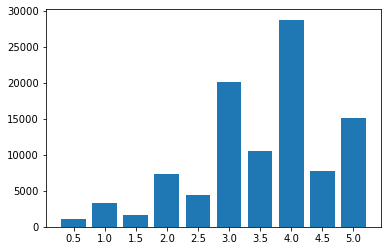

In [3]:
rdata =df_ratings.rating.value_counts()
x=list(rdata.keys())
y=list(rdata)
plt.bar(x,y,width = 0.4)
plt.xticks(np.arange(0.5, 5.5, step=0.5))
plt.show()

In [4]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100004 non-null  int64  
 1   movieId  100004 non-null  int64  
 2   rating   100004 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [5]:
df_ratings.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [6]:
#swapping columns
df_ratings=df_ratings[['userId','movieId','rating']] 
df_ratings.columns = ['n_users','n_items','rating']

train,test = train_test_split(df_ratings, test_size=0.25 )

reader = surprise.Reader(rating_scale=(0.5,5)) 

#into surprise:
data = surprise.Dataset.load_from_df(train,reader)
test = surprise.Dataset.load_from_df(test,reader)

In [7]:
# split data into folds. 
kSplit = surprise.model_selection.split.KFold(n_splits=10, shuffle=True) 

In [8]:
method = surprise.SVD(random_state=0)

In [9]:
rmseSVD = []
i=0
for trainset, testset in kSplit.split(data): #iterate through the folds.
    method.fit(trainset)
    predictionsSVD = method.test(testset)
    i+=1
    print("\nfold ",i,"\n========")
    rmseSVD.append(surprise.accuracy.rmse(predictionsSVD,verbose=True))#get root means squared error


fold  1 
RMSE: 0.9093

fold  2 
RMSE: 0.8942

fold  3 
RMSE: 0.8892

fold  4 
RMSE: 0.9168

fold  5 
RMSE: 0.9023

fold  6 
RMSE: 0.8940

fold  7 
RMSE: 0.8981

fold  8 
RMSE: 0.9104

fold  9 
RMSE: 0.9031

fold  10 
RMSE: 0.8965


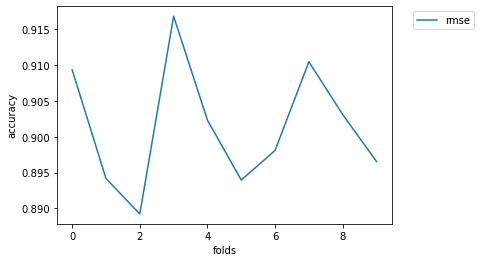

In [10]:
#plotting the prediction data:
import matplotlib.pyplot as plt
modelPrediction = plt.plot(rmseSVD,label='rmse')

modelPrediction = plt.xlabel('folds')
modelPrediction = plt.ylabel('accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [11]:
print("Average RMSE: ",sum(rmseSVD) / len(rmseSVD))

Average RMSE:  0.9013918588000187


In [12]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9206080330220536
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}
